#### Project : Crude Oil Price Prediction

In [163]:
#Import Libraries
import pandas as pd
import seaborn as sns
from pandas import read_excel
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas import DataFrame
from pandas import Grouper
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import calendar
from math import sqrt
from pandas import datetime
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf 
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [164]:
#oil = read_excel('/Users/vaishalimukherjee/Desktop/Project 1/oilprice/RWTCw.xls')
#oil.head()

In [165]:
oil = read_excel('/Users/vaishalimukherjee/Desktop/Project 1/oilprice/RWTCd.xls')
oil.head()

,Date,COSP
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [166]:
#

In [167]:
#df1 = read_excel('/Users/vaishalimukherjee/Desktop/Project 1/oilprice/RWTCa.xls')
###df1 = pd.read_excel('/Users/vaishalimukherjee/Desktop/Project 1/oilprice/RWTCmtest.xls')
df = read_excel('/Users/vaishalimukherjee/Desktop/Project 1/oilprice/RWTCd.xls')
df = oil.copy()
df.set_index('Date', inplace=True)



### DownSampling Daily to Monthly

In [168]:
downsampled = df.resample('M').mean()
print(downsampled.head(10))

                 COSP
Date                 
1986-01-31  22.925455
1986-02-28  15.454737
1986-03-31  12.612500
1986-04-30  12.843636
1986-05-31  15.377619
1986-06-30  13.425714
1986-07-31  11.584545
1986-08-31  15.096667
1986-09-30  14.866667
1986-10-31  14.896818


In [169]:
downsampled.shape

(457, 1)

# Split Train Test Data

In [170]:
#Splitting Train and Test Data sequentially for our time series dataset
size = 433
train_data = downsampled[:size]
test_data = downsampled[size:]

In [171]:
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: 1986-01-31 00:00:00 2022-01-31 00:00:00 
 Test: 2022-02-28 00:00:00 2024-01-31 00:00:00


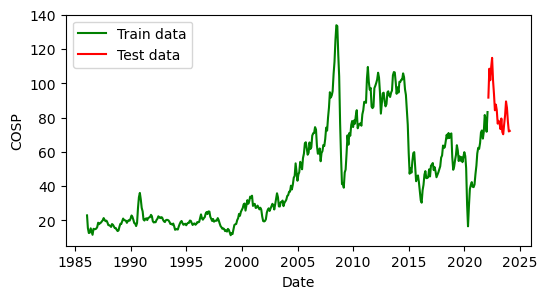

In [172]:
plt.figure(figsize=(6,3))
plt.xlabel('Date')
plt.ylabel('COSP')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

## Data Driven Models

### Evaluation Metric MAPE

In [173]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [174]:
#SES
ses_model = SimpleExpSmoothing(train_data['COSP']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
mape_ses = MAPE(test_pred_ses,test_data.COSP)
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.COSP.head(24)))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data.COSP))
print(mape_ses)
print(test_rmse_ses )
print (train_rmse_ses)

11.475108285619482
13.109678580600827
4.5393810017160385


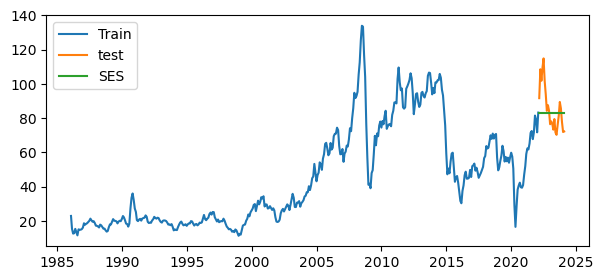

In [175]:
plt.figure(figsize=(7,3))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='SES')
plt.legend(loc='best')
plt.show()

### SES:
1. Seasonality is not captured
2. recent observations have more weightage compared to older ones for forecasting

In [176]:
# DES
dexp_model  = Holt(train_data).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(24)
train_pred_dexp = dexp_model.fittedvalues
mape_dexp = MAPE(test_pred_dexp,test_data.COSP)
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.COSP))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data))
print(mape_dexp)
print(test_rmse_dexp)
print(train_rmse_dexp)

12.514274985441718
13.618835227784576
4.5373168065069125


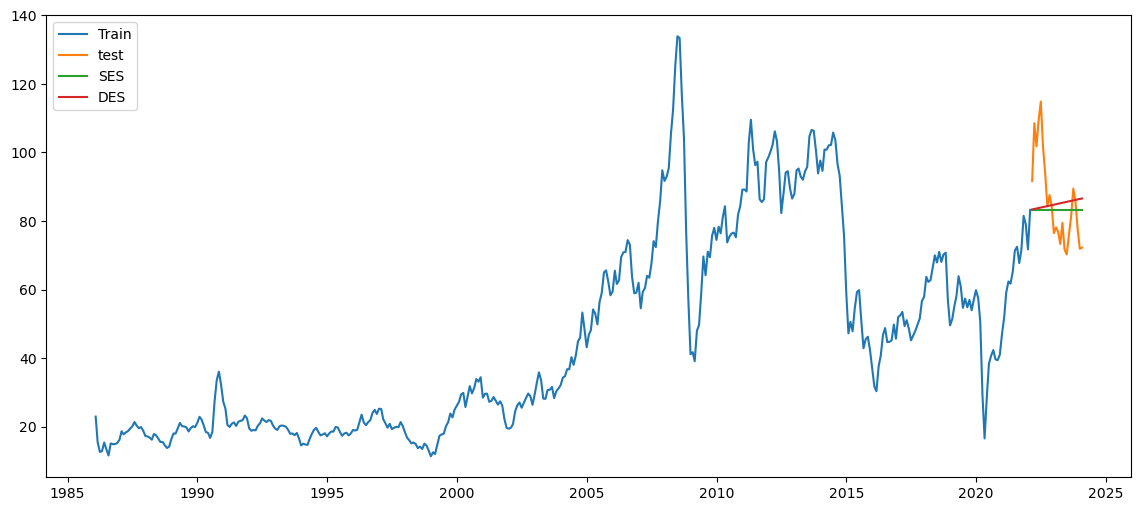

In [177]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='SES')
plt.plot(test_pred_dexp, label='DES')
plt.legend(loc='best')
plt.show()

### DES:
1. We are able to capture the level and trend is shown as uptrend
2. Seasonality is not captured

In [178]:
#Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)
texp_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(24)
train_pred_ad_texp = texp_add_model.fittedvalues

mape_ad_texp = MAPE(test_pred_ad_texp,test_data.COSP)
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_data.COSP))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_data))

print(mape_ad_texp)
print(test_rmse_ad_texp)
print(train_rmse_ad_texp)

12.728234287963899
13.259708472975065
4.4702814980826435


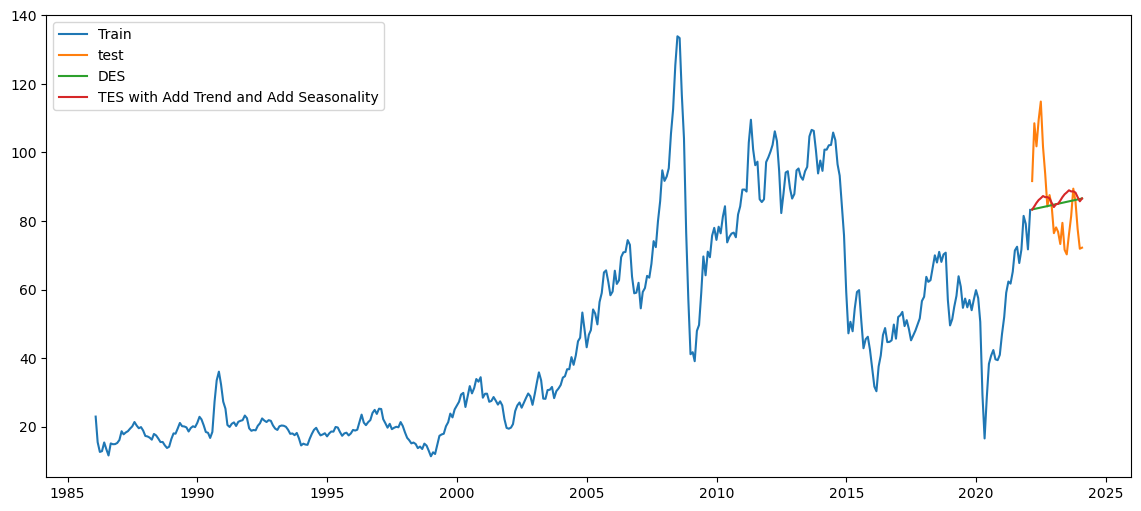

In [179]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
#plt.plot(test_pred_ses, label='SES')
plt.plot(test_pred_dexp, label='DES')
plt.plot(test_pred_ad_texp, label='TES with Add Trend and Add Seasonality')
plt.legend(loc='best')
plt.show()

### Observation:
1. It is capturing the Level, Trend, Seasonality

In [180]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)
texp_mul_ad_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(24)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_data.COSP)
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_data.COSP))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_data))

print(mape_mul_ad_texp)
print(test_rmse_mul_ad_texp)
print(train_rmse_mul_ad_texp)

13.342626474873128
13.211462493606557
4.3953332115837425


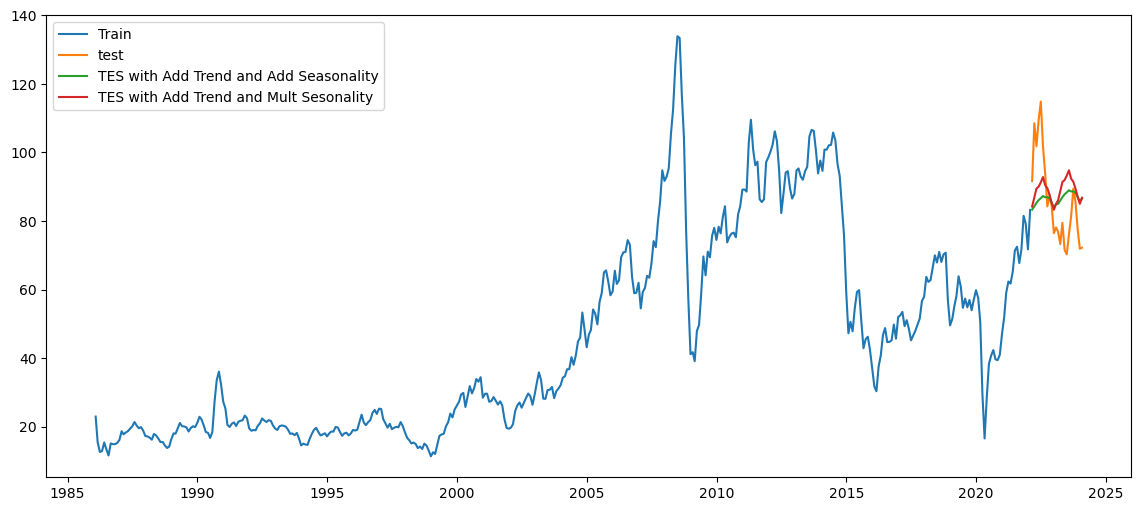

In [181]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
#plt.plot(test_pred_ses, label='SES')
#plt.plot(test_pred_dexp, label='DES')
plt.plot(test_pred_ad_texp, label='TES with Add Trend and Add Seasonality')
plt.plot(test_pred_mul_ad_texp, label='TES with Add Trend and Mult Sesonality')
plt.legend(loc='best')
plt.show()


### Observation:
1. It is capturing the Level, Trend, Seasonality

In [182]:
#Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)
texp_ad_mul_model  = ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(24)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.COSP)
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.COSP))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data))

print(mape_ad_mul_texp)
print(test_rmse_ad_mul_texp)
print(train_rmse_ad_mul_texp)

95.40475092734518
88.34955552428485
13.654008360939109


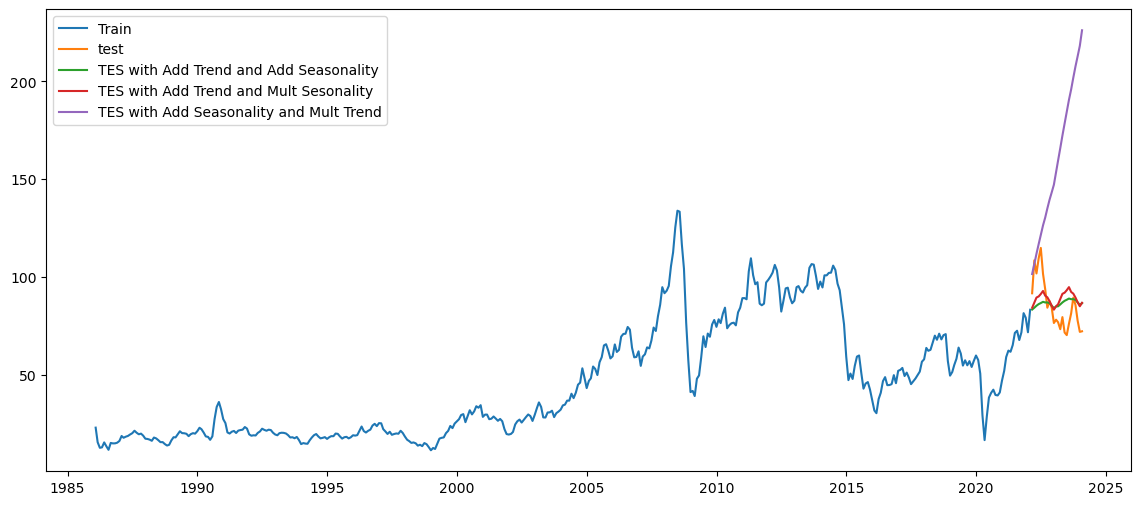

In [183]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
#plt.plot(test_pred_ses, label='SES')
#plt.plot(test_pred_dexp, label='DES')
plt.plot(test_pred_ad_texp, label='TES with Add Trend and Add Seasonality')
plt.plot(test_pred_mul_ad_texp, label='TES with Add Trend and Mult Sesonality')
plt.plot(test_pred_ad_mul_texp, label='TES with Add Seasonality and Mult Trend')
plt.legend(loc='best')
plt.show()

### Observation
1. Its capturing the Trend to some extend 
2. Seasonality is not captured

In [184]:
#Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)
texp_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(24)
train_pred_mul_texp  = texp_mul_model.fittedvalues
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data.COSP)
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data.COSP))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data))

print(mape_mul_texp)
print(test_rmse_mul_texp)
print(train_rmse_mul_texp)

11.110080294933034
11.766311511893635
4.3979741408918205


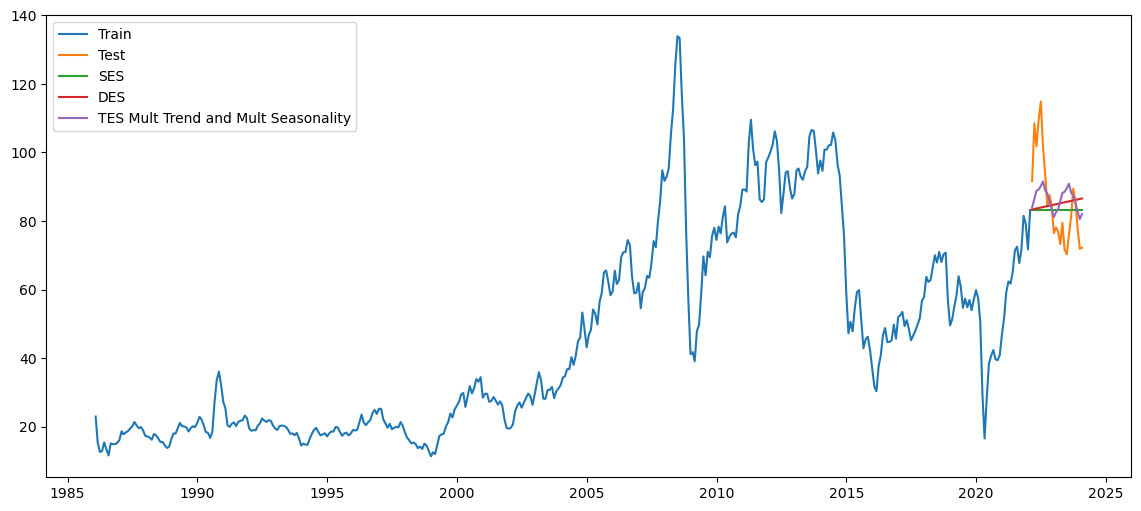

In [185]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='SES')
plt.plot(test_pred_dexp, label='DES')
#plt.plot(test_pred_ad_texp, label='TES with Add Trend and Add Seasonality')
#plt.plot(test_pred_mul_ad_texp, label='TES with Add Trend and Mult Sesonality')
#plt.plot(test_pred_ad_mul_texp, label='TES with Add Seasonality and Mult Trend')
plt.plot(test_pred_mul_texp, label='TES Mult Trend and Mult Seasonality')
plt.legend(loc='best')
plt.show()

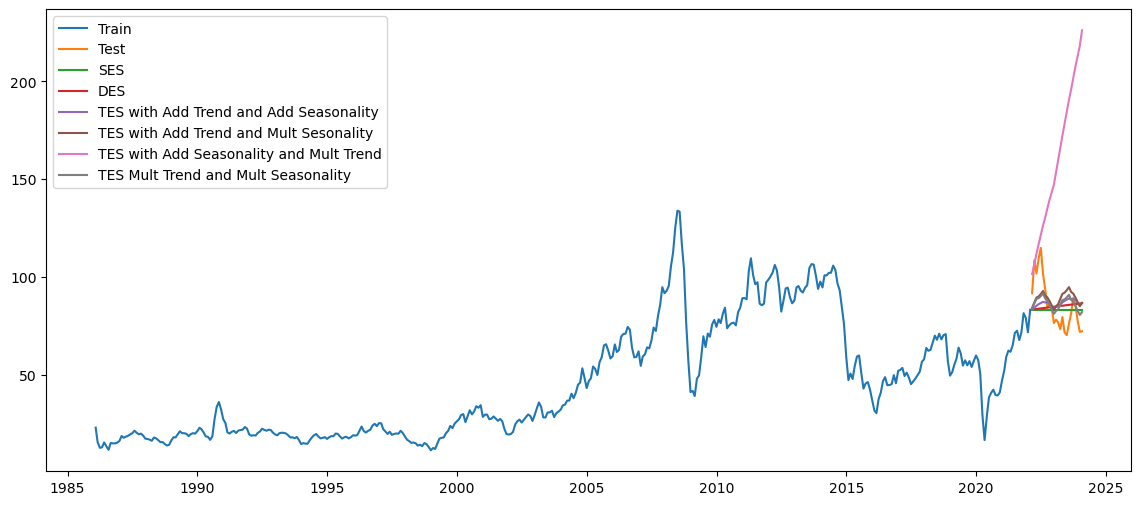

In [186]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='SES')
plt.plot(test_pred_dexp, label='DES')
plt.plot(test_pred_ad_texp, label='TES with Add Trend and Add Seasonality')
plt.plot(test_pred_mul_ad_texp, label='TES with Add Trend and Mult Sesonality')
plt.plot(test_pred_ad_mul_texp, label='TES with Add Seasonality and Mult Trend')
plt.plot(test_pred_mul_texp, label='TES Mult Trend and Mult Seasonality')
plt.legend(loc='best')
plt.show()

### Observation
1. Its capturing the Trend 
2. Seasonality is captured

In [188]:
# Comparing Results
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul"]), 
            "Test_RMSE":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp]),
              "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_RMSE'], inplace=True, ignore_index=True)
table_evaluation

,Models,Test_RMSE,Test_MAPE(%)
0,Triple_Exp_Mul,11.766312,11.110080
1,Simple_Exp,13.109679,11.475108
2,Triple_Exp_Mul_Add,13.211462,13.342626
3,Triple_Exp_Add,13.259708,12.728234
4,Double_Exp,13.618835,12.514275
5,Triple_Exp_Add_Mul,88.349556,95.404751
